This notebook is for unsderstanding ARMA(Time Series Model) of statsmodels

Reference : http://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMA.html

versions :  
- python 3.6.2  
- statsmodels 0.8.0  
- scikit-learn 0.19.1 

In [14]:
import warnings
warnings.simplefilter(action='ignore')

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Before starting this notebook

Get data from the site below as a csv file and save it somewhere so that we can access via data_path
- Sales of shampoo over a three year period 
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line
(We can export data as csv format.)

# Load and check data

In [2]:
# path to data we save 
data_path = './sales-of-shampoo-over-a-three-ye.csv'

# read the csv file
shampoo_df = pd.read_csv(data_path)
shampoo_df.rename(columns={'Sales of shampoo over a three year period': 'Sales'}, inplace=True)
shampoo_df.drop(len(shampoo_df) - 1, inplace=True) # delete the last unnecessary row

In [3]:
print('Shape : ', shampoo_df.shape)
print('Column : ', shampoo_df.columns)

Shape :  (36, 2)
Column :  Index(['Month', 'Sales'], dtype='object')


In [4]:
shampoo_df.index = shampoo_df['Month']
del shampoo_df['Month']

In [5]:
# check DataFrame
shampoo_df.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


# Check times series by graph

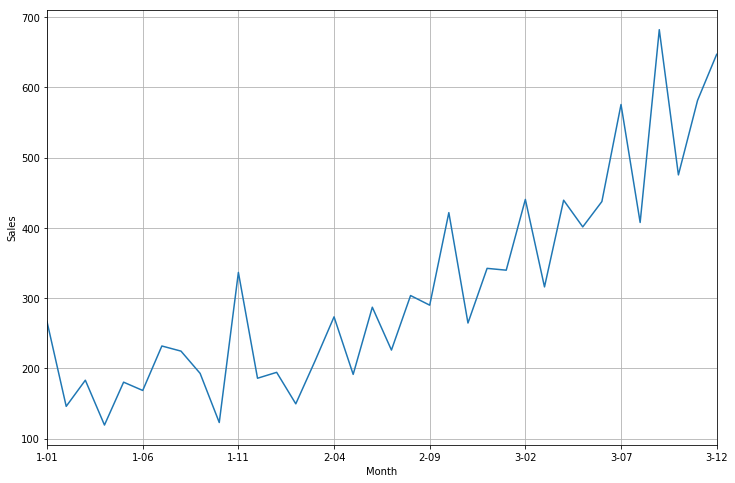

In [6]:
# Time Series Graph
ax = shampoo_df['Sales'].plot(figsize=(12, 8), grid=True)
ax.set_ylabel('Sales')
plt.show()

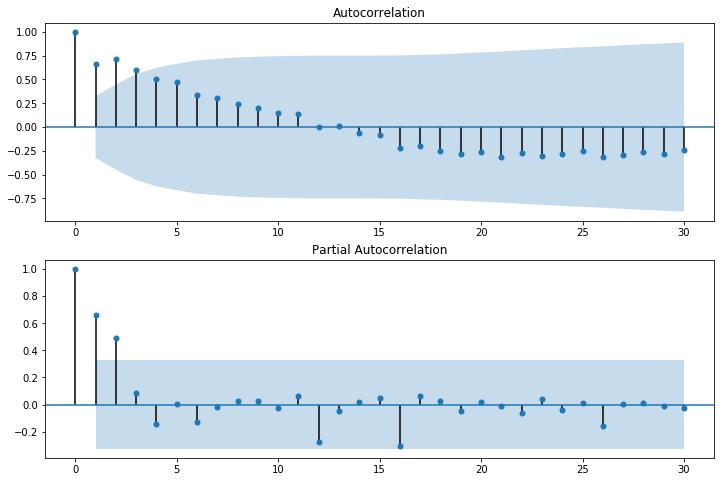

In [7]:
# Autocorrelation and Partial Autocorrelation function

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)

# Plot of ACF with 95% confidence interval
sm.graphics.tsa.plot_acf(shampoo_df['Sales'], lags=30, alpha=0.05, ax=ax1)

ax2 = fig.add_subplot(212)

# Plot of partial ACF with 95% confidence interval
sm.graphics.tsa.plot_pacf(shampoo_df['Sales'].values, lags=30, alpha=0.05, ax=ax2)

plt.show()

In [8]:
# Get value of Autocorrelation function
sm.tsa.stattools.acf(shampoo_df['Sales'], nlags=30)

array([ 1.        ,  0.66255777,  0.7165448 ,  0.60323689,  0.50618008,
        0.47474817,  0.33604178,  0.3101703 ,  0.23757292,  0.19586055,
        0.1518714 ,  0.13957659, -0.00304812,  0.01174439, -0.06558828,
       -0.07950614, -0.21738274, -0.19666519, -0.24995429, -0.28418939,
       -0.25892599, -0.31978524, -0.2774319 , -0.30531272, -0.28062076,
       -0.25393256, -0.31575358, -0.29668147, -0.25866995, -0.28414567,
       -0.24613791])

# Modeling

In [ ]:
# Select degree of ARMA based on AIC and BIC
# reference: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.arma_order_select_ic.html

res = sm.tsa.stattools.arma_order_select_ic(shampoo_df.values, ic=['aic', 'bic'])
print('Degree to minimize AIC : ', res.aic_min_order)
print('Degree to minimize BIC : ', res.bic_min_order)

In [10]:
# fit data to ARMA model of (p, q) degree
model = sm.tsa.ARMA(shampoo_df['Sales'].values, order=(1, 2)).fit()

In [11]:
# check modeling summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                     ARMA(1, 2)   Log Likelihood                -203.044
Method:                       css-mle   S.D. of innovations             60.642
Date:                Sun, 24 Feb 2019   AIC                            416.089
Time:                        22:21:16   BIC                            424.006
Sample:                             0   HQIC                           418.852
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        374.8801    135.142      2.774      0.009     110.006     639.754
ar.L1.y        0.9676      0.034     28.687      0.000       0.901       1.034
ma.L1.y       -1.2999      0.118    -11.032      0.000      -1.531      -1.069
ma.L2.y        1.0000      0.140      7.157      0.000       0.726       1.274
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0335           +0.0000j            1.0335            0.0000
MA.1            0.6499           -0.7600j            1.0000           -0.1374
MA.2            0.6499           +0.7600j            1.0000            0.1374
-----------------------------------------------------------------------------
"""

In [12]:
print('AIC : ', model.aic)
print('BIC : ', model.bic)
print('Model Parameters : ', model.params)
print('Residual : ', model.resid)

AIC :  416.0887761303213
BIC :  424.00637082260187
Model Parameters :  [374.88010228   0.96760045  -1.2998697    1.        ]
Residual :  [-108.88010228 -144.95658692  -60.551348    -88.57834876   -9.72083003
   31.74889334   98.25720872   79.093346    -20.69277047 -163.23687813
   28.99125609   16.77219159   -2.20573388  -67.65268655  -27.15020007
   83.56244528   40.74109158   65.61054741  -19.01250988   -9.70864702
  -10.78844949  124.34345592    9.13899391  -28.44600449  -47.51084544
   66.27130625    4.58152541   65.64713302   42.19393575   28.92248419
  137.04579668  -16.10613407  126.64920076  -21.68914956  -37.57396091
   45.3030204 ]


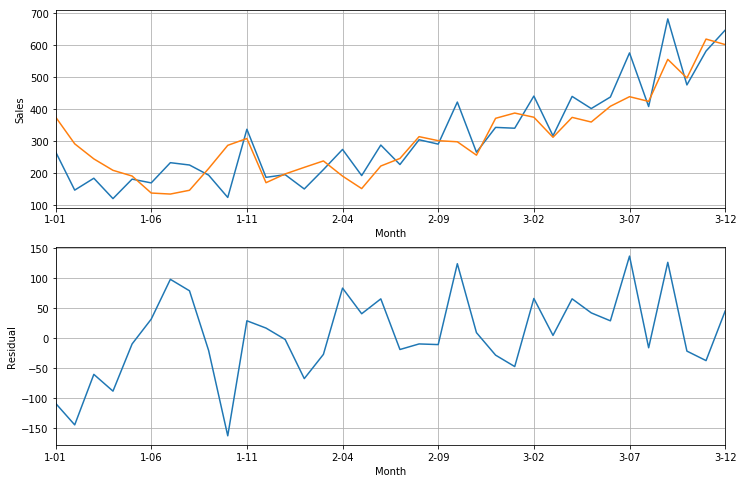

In [13]:
# Plot prediction and residual

shampoo_df['Residual'] = model.resid
shampoo_df['Prediction'] = model.predict(start=0, end=len(shampoo_df) - 1)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(211)

shampoo_df['Sales'].plot(grid=True)
shampoo_df['Prediction'].plot(grid=True)
ax.set_ylabel('Sales')

ax = fig.add_subplot(212)
shampoo_df['Residual'].plot(grid=True)
ax.set_ylabel('Residual')

plt.show()